<b><h1> Environmental Challenges in Delhi</h1></b>

<b>Delhi faces several environmental challenges related to air quality, including:</b>
<ol><li>High levels of particulate matter (PM2.5 and PM10) due to vehicular emissions, industrial activities, and construction dust.</li>
<li>Seasonal variations in pollution levels, with winter months often experiencing severe smog due to temperature inversions 
    and crop burning in neighboring regions.</li>
<li>Geographical factors such as being landlocked, which can trap pollutants.</li>
<li>Rapid urbanization leading to increased emissions from various sources.</li></ol>

<b>Based on these challenges, we can define the following research questions:</b>
<ol><li><b>Key Pollutants:</b></li>
<ul><li>What are the temporal trends of major pollutants (PM2.5, PM10, NO2, O3) in Delhi?</li>
    
<li>How do these pollutants compare to WHO guidelines?</li></ul>
<li><b>Seasonal Variations:</b></li>
<ul><li>How do pollutant levels vary across different seasons in Delhi?</li>
    
<li>Which season experiences the highest pollution levels, and what are the contributing factors?</li></ul>
<li><b>Geographical Factors:</b></li>
<ul><li>How do geographical factors like wind patterns and temperature influence air quality in Delhi?</li>
    
<li>Are there specific areas within Delhi that experience higher pollution levels due to geographical or urban planning factors?</li></ul>
<li><b>Health Impact:</b></li>
<ul><li>What is the potential health impact of prolonged exposure to high levels of PM2.5 and PM10 in Delhi?</li>
    
<li>How does air quality affect vulnerable populations, such as children and the elderly, in Delhi?</li></ul></ol>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [9]:
plt.style.use('default')
sns.set_theme()
sns.set_palette("husl")

# Read the data
df = pd.read_csv('delhiaqi.csv')

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['season'] = pd.cut(df['date'].dt.month, 
                     bins=[0, 2, 5, 8, 11, 12],
                     labels=['Winter', 'Spring', 'Summer', 'Monsoon', 'Winter'],
                     ordered=False)

def display_dataset_preview():
    """Display first few rows and basic information about the dataset"""
    print("\nFirst 10 rows of the dataset:")
    print("-" * 100)
    print(df.head(10))
    print("\nDataset Information:")
    print("-" * 100)
    print(df.info())

In [10]:
def analyze_pollutant_trends():
    """Analyze trends for each pollutant"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Daily Average Pollutant Levels in Delhi', fontsize=16)
    
    # Plot PM2.5
    df.groupby(df['date'].dt.date)['pm2_5'].mean().plot(ax=axes[0,0])
    axes[0,0].set_title('PM2.5 Trends')
    axes[0,0].set_ylabel('μg/m³')
    
    # Plot PM10
    df.groupby(df['date'].dt.date)['pm10'].mean().plot(ax=axes[0,1])
    axes[0,1].set_title('PM10 Trends')
    axes[0,1].set_ylabel('μg/m³')
    
    # Plot NO2
    df.groupby(df['date'].dt.date)['no2'].mean().plot(ax=axes[1,0])
    axes[1,0].set_title('NO2 Trends')
    axes[1,0].set_ylabel('μg/m³')
    
    # Plot O3
    df.groupby(df['date'].dt.date)['o3'].mean().plot(ax=axes[1,1])
    axes[1,1].set_title('O3 Trends')
    axes[1,1].set_ylabel('μg/m³')
    
    plt.tight_layout()
    plt.show()

In [11]:
def analyze_seasonal_patterns():
    """Analyze seasonal patterns in air quality"""
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    fig.suptitle('Seasonal Distribution of Pollutants', fontsize=16)
    
    sns.boxplot(x='season', y='pm2_5', data=df, ax=axes[0,0])
    axes[0,0].set_title('PM2.5 by Season')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    sns.boxplot(x='season', y='pm10', data=df, ax=axes[0,1])
    axes[0,1].set_title('PM10 by Season')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    sns.boxplot(x='season', y='no2', data=df, ax=axes[1,0])
    axes[1,0].set_title('NO2 by Season')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    sns.boxplot(x='season', y='o3', data=df, ax=axes[1,1])
    axes[1,1].set_title('O3 by Season')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

In [12]:
def analyze_daily_patterns():
    """Analyze daily patterns in air quality"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Daily Patterns of Pollutants', fontsize=16)
    
    pollutants = ['pm2_5', 'pm10', 'no2', 'o3']
    positions = [(0,0), (0,1), (1,0), (1,1)]
    
    for pollutant, pos in zip(pollutants, positions):
        hourly_avg = df.groupby('hour')[pollutant].mean()
        hourly_avg.plot(ax=axes[pos[0], pos[1]], marker='o')
        axes[pos[0], pos[1]].set_title(f'Average {pollutant.upper()} by Hour')
        axes[pos[0], pos[1]].set_xlabel('Hour of Day')
        axes[pos[0], pos[1]].set_ylabel('Concentration (μg/m³)')
    
    plt.tight_layout()
    plt.show()

In [13]:
def generate_correlation_analysis():
    """Generate correlation analysis between pollutants"""
    correlation_matrix = df[['pm2_5', 'pm10', 'no2', 'o3', 'so2', 'co', 'nh3']].corr()
    
    plt.figure(figsize=(8, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Between Different Pollutants')
    plt.tight_layout()
    plt.show()


First 10 rows of the dataset:
----------------------------------------------------------------------------------------------------
                 date       co     no    no2      o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41    5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16    1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87    0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55    0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24    5.45  39.10  266.36  322.80   
5 2023-01-01 05:00:00  3578.19  64.37  55.52   14.13  44.35  276.54  336.79   
6 2023-01-01 06:00:00  3578.19  46.94  76.09   33.26  50.54  295.40  357.07   
7 2023-01-01 07:00:00  1468.66   9.83  47.30  105.86  68.66  158.83  182.61   
8 2023-01-01 08:00:00  1161.58   5.81  35.99  125.89  61.99  134.39  153.47   
9 2023-01-01 09:00:00  1161.58   4.58  36.33  134.47  65.80  133.22  152.09   

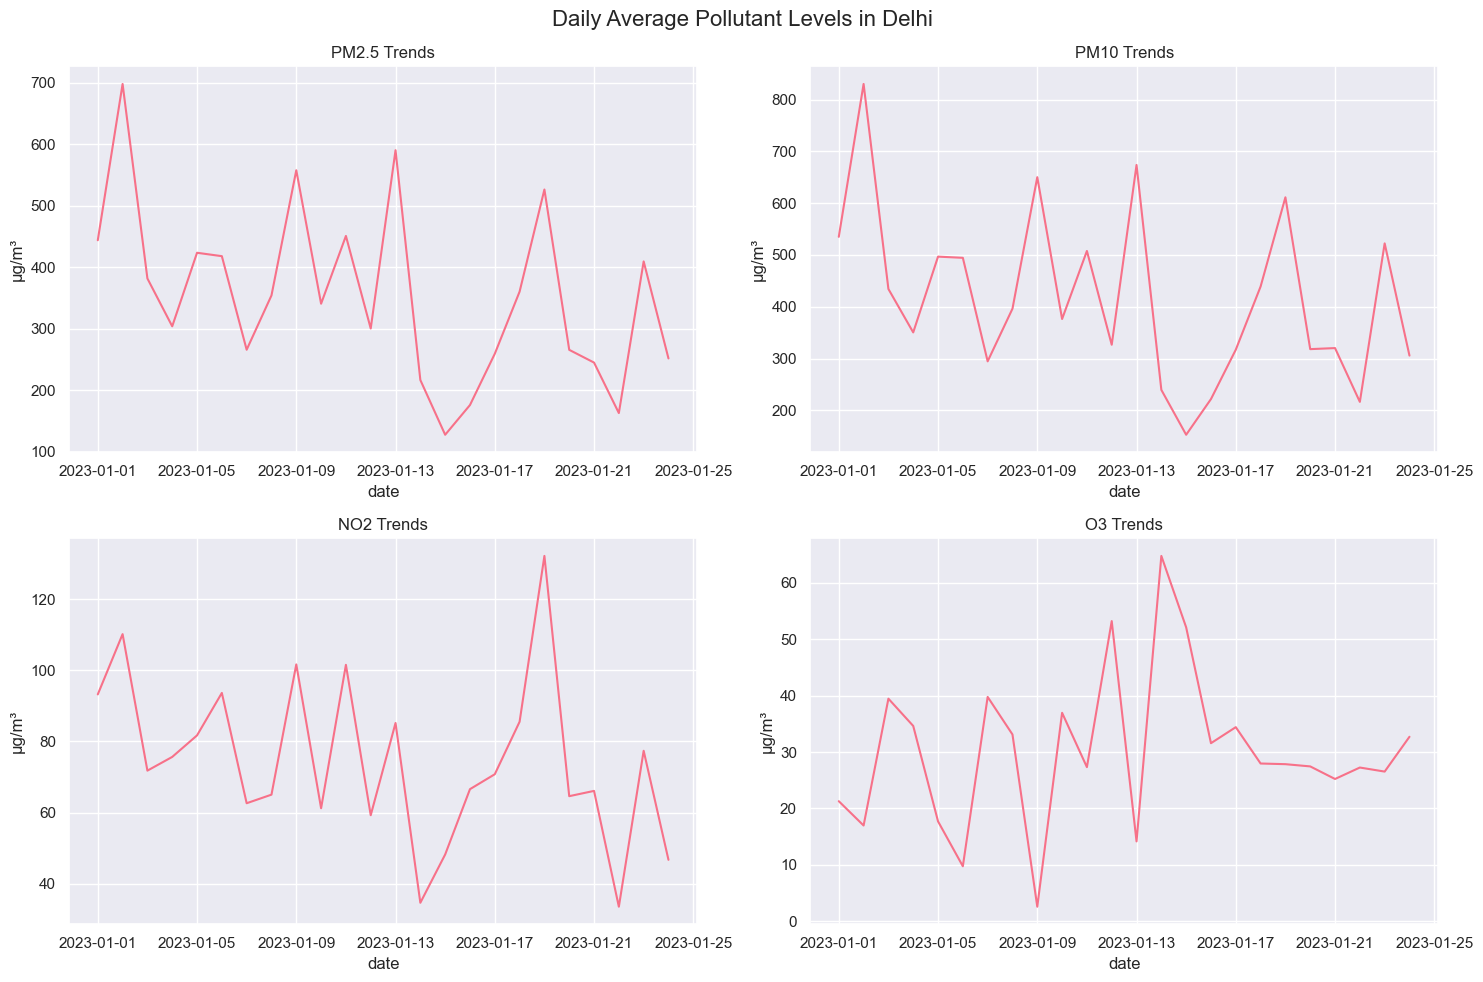

C:\Users\Dhara\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dhara\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dhara\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

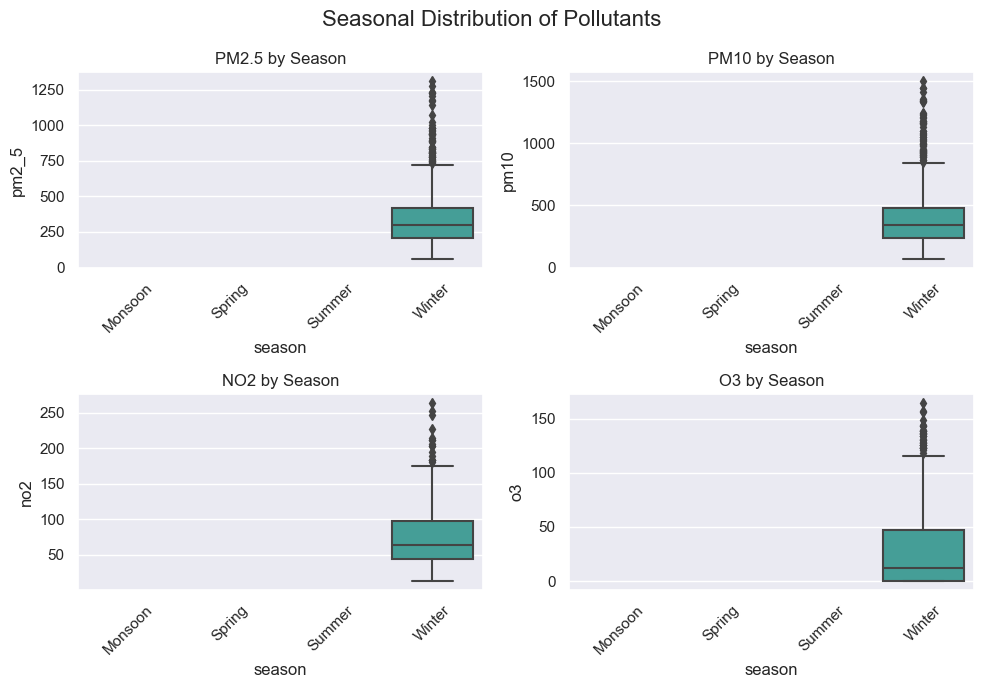

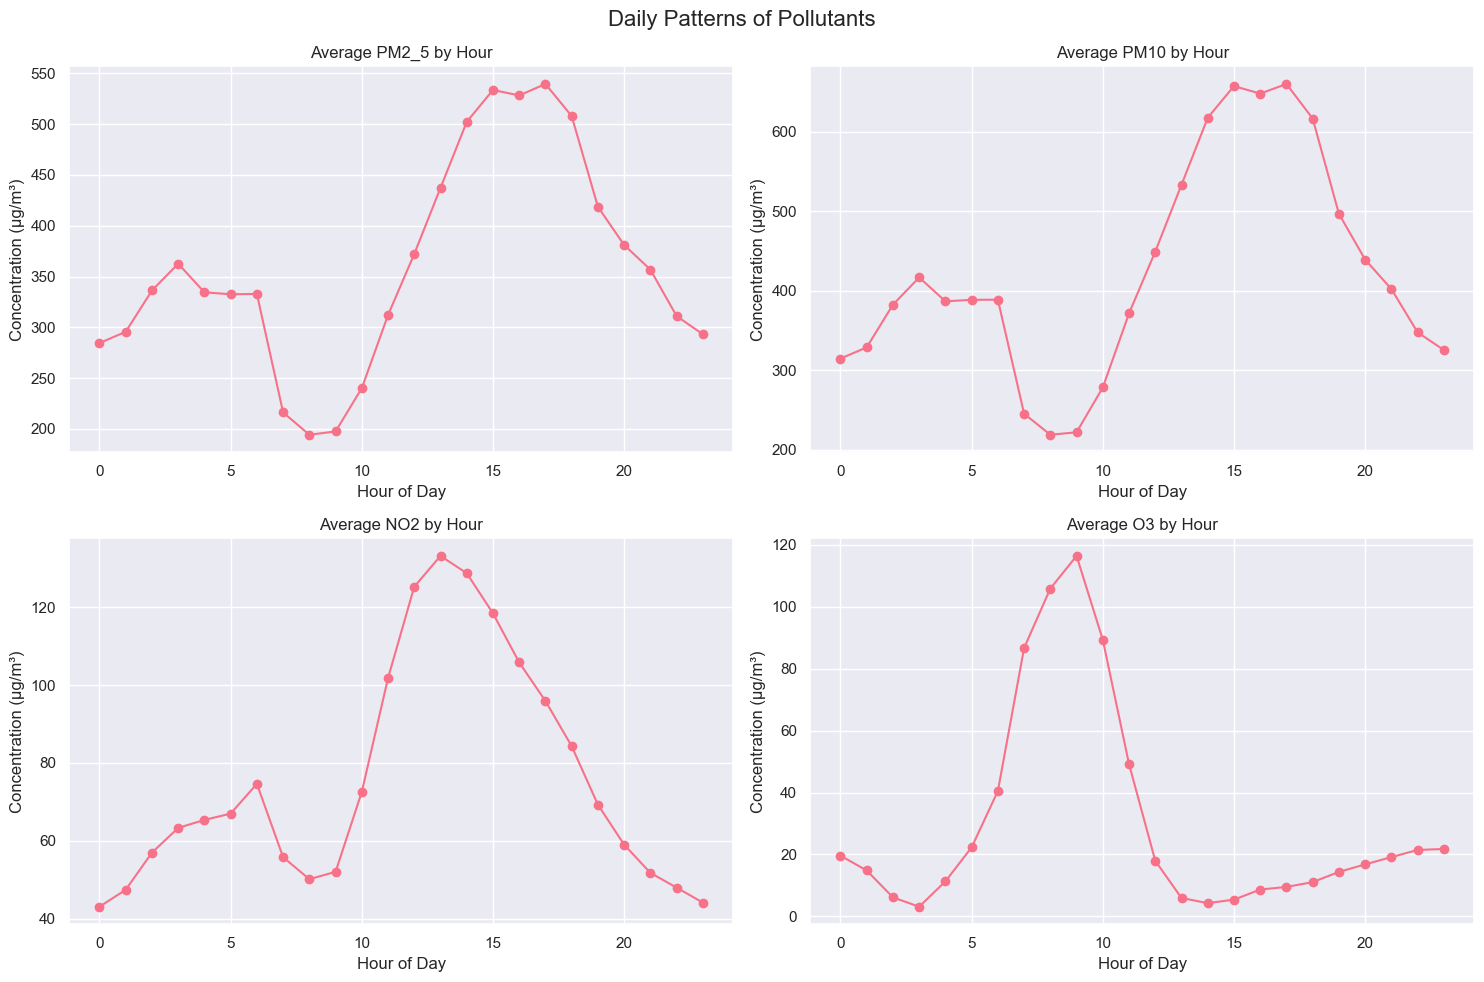

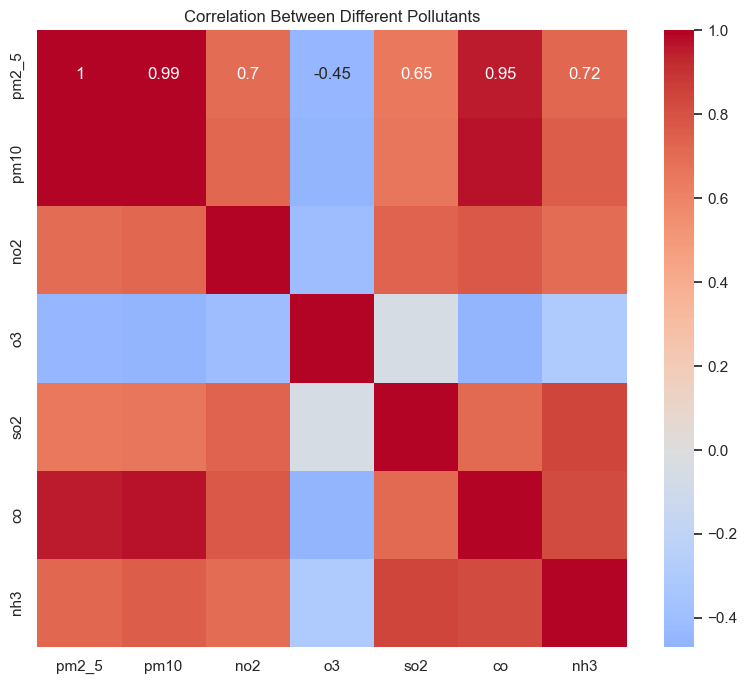


Key Findings from Delhi AQI Analysis:
--------------------------------------------------
Average PM2.5 level: 358.26 μg/m³
Percentage of time PM2.5 exceeds WHO guidelines: 100.0%
Peak pollution typically occurs at: 17:00 hours
Worst season for air quality: Winter


C:\Users\Dhara\AppData\Local\Temp\ipykernel_2096\2637952221.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = df.groupby('season')['pm2_5'].mean()


In [15]:
def main():
    display_dataset_preview()
    
    # Run all analyses
    print("\nGenerating visualizations... (Close each plot window to see the next one)")
    analyze_pollutant_trends()
    analyze_seasonal_patterns()
    analyze_daily_patterns()
    generate_correlation_analysis()
    
    # Print key findings
    print("\nKey Findings from Delhi AQI Analysis:")
    print("-" * 50)
    
    # Calculate average PM2.5 levels
    avg_pm25 = df['pm2_5'].mean()
    print(f"Average PM2.5 level: {avg_pm25:.2f} μg/m³")
    
    # Calculate percentage of time PM2.5 exceeds WHO guidelines (25 μg/m³)
    who_exceeded = (df['pm2_5'] > 25).mean() * 100
    print(f"Percentage of time PM2.5 exceeds WHO guidelines: {who_exceeded:.1f}%")
    
    # Find peak pollution hours
    peak_hour = df.groupby('hour')['pm2_5'].mean().idxmax()
    print(f"Peak pollution typically occurs at: {peak_hour}:00 hours")
    
    # Calculate seasonal averages
    seasonal_avg = df.groupby('season')['pm2_5'].mean()
    worst_season = seasonal_avg.idxmax()
    print(f"Worst season for air quality: {worst_season}")

if __name__ == "__main__":
    main() 

<b><h3>Comprehensive Understanding and Strategies:</h3></b>


By conducting these analyses, we can gain a comprehensive understanding of the air quality dynamics in Delhi. This understanding can inform targeted strategies for air quality improvement, such as:
Implementing stricter emission controls for vehicles and industries.
Promoting public transportation and cleaner energy sources.
Enhancing urban planning to reduce pollution hotspots.
Raising public awareness about the health impacts of air pollution.